In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob


# Carregar Dados

In [146]:
files=glob.glob('../archive/*.csv')
files

['../archive/parque_chapada_dos_veadeiros.csv',
 '../archive/mercado-ver-o-peso-pa.csv',
 '../archive/beto-carreiro-sc.csv',
 '../archive/pelourinho_ba.csv',
 '../archive/praia-copacabana-rj.csv',
 '../archive/museu_imperial.csv',
 '../archive/praca-3-poderes-br.csv',
 '../archive/museu_arte_sp.csv',
 '../archive/jardim_botanico.csv',
 '../archive/elevador_lacerda.csv',
 '../archive/aqua-rio-rj.csv',
 '../archive/parque_jalapao.csv',
 '../archive/parque_nacional_iguacu.csv',
 '../archive/mercado-central-fortaleza-ce.csv',
 '../archive/hopi_hari.csv']

In [147]:
#dados será um dicionário com os comentários e as notas de cada usuário
# as chaves do dicionário são os nomes das atrações turísticas

dados={}

for file in files:
    dados[file.split('/')[-1].split('.')[0]]=pd.read_csv(file, delimiter=';')



In [148]:
dados.keys()
nome_atracoes=list(dados.keys())

# Análise Exploratória

## Comparativo entre as notas das atrações

In [149]:
#Verificando a existência de entradas nulas
print('Número de entradas nulas para as notas das atrações:')
print('')
for nome in nome_atracoes:
    print(nome+ ' : {}'.format(dados[nome]['nota'].isnull().sum()))

Número de entradas nulas para as notas das atrações:

parque_chapada_dos_veadeiros : 0
mercado-ver-o-peso-pa : 0
beto-carreiro-sc : 0
pelourinho_ba : 0
praia-copacabana-rj : 0
museu_imperial : 0
praca-3-poderes-br : 0
museu_arte_sp : 0
jardim_botanico : 0
elevador_lacerda : 0
aqua-rio-rj : 0
parque_jalapao : 0
parque_nacional_iguacu : 0
mercado-central-fortaleza-ce : 0
hopi_hari : 0


In [150]:
 
def calcular_proporcao_notas(dados):
    '''
    Função exibe o número de votos que atribuiu cada nota e a proporção desse número de votos em relação ao total 
    de votos para a atração selecionada

    input - dicionário com conjunto de dados para cada atração

    '''
    cont=0
    print('Número correpondente a cada atração')
    for i in dados.keys():
        print(str(cont) +'-' +i )
        cont+=1
    
    
    num=None
    while num not in np.arange(0,15):
        try:
            num=input('Selecione a atração (digite o número correpondente a atração desejada ou -1 para sair): ')
            num=int(num)
            if num not in np.arange(0,15):
                raise Exception()
        except:
            if num==-1:
                return None
            print('Entrada Inválida. Digite o número da atração desejada ou -1 para sair')
    nome_atracao=list(dados.keys())[num]
    dados_atracao=dados[nome_atracao]
    notas_atracao=dados_atracao.groupby('nota').agg(Número_de_Avaliações=('nota','count'))
    notas_atracao['Proporção de Avaliações']=notas_atracao['Número_de_Avaliações']/notas_atracao['Número_de_Avaliações'].sum()
    print('')
    print('Nome da atração: {}'.format(nome_atracao))
    print('Total de avaliações: {}'.format(notas_atracao['Número_de_Avaliações'].sum()))
    print(notas_atracao)
    

    
                 

In [151]:
proporcao_notas=[]
for nome_atracao in nome_atracoes:
    #x=dados[nome_atracao].groupby('nota').agg(Total=('nota','count'))
    proporcao_notas+=[[(dados[nome_atracao]['nota']==nota).sum() for nota in [1,2,3,4,5]]]
proporcao_notas=pd.DataFrame(proporcao_notas,index=nome_atracoes)
proporcao_notas["Total Avaliações"]=proporcao_notas.sum(axis=1)
proporcao_notas.iloc[:,:5]=proporcao_notas.iloc[:,:5].div(proporcao_notas["Total Avaliações"],axis=0)
proporcao_notas.columns=   ['nota 1(%)',
                            'nota 2(%)',
                            'nota 3(%)',
                            'nota 4(%)',
                            'nota 5(%)',
                             "Total Avaliações"]

In [152]:
proporcao_notas

,nota 1(%),nota 2(%),nota 3(%),nota 4(%),nota 5(%),Total Avaliações
parque_chapada_dos_veadeiros,0.002203,0.003672,0.021667,0.148366,0.824091,2723
mercado-ver-o-peso-pa,0.046576,0.079845,0.222345,0.319379,0.331855,3607
beto-carreiro-sc,0.093956,0.056684,0.080756,0.203572,0.565032,7727
pelourinho_ba,0.024637,0.040003,0.165692,0.352347,0.417321,11974
praia-copacabana-rj,0.011091,0.023617,0.117563,0.278314,0.569415,7664
museu_imperial,0.002822,0.005080,0.034994,0.247778,0.709327,7087
praca-3-poderes-br,0.006485,0.016537,0.150778,0.372568,0.453632,3084
museu_arte_sp,0.004138,0.010760,0.060420,0.275782,0.648899,6041
jardim_botanico,0.001403,0.003724,0.050498,0.253458,0.690916,20674
elevador_lacerda,0.026991,0.064808,0.278066,0.317959,0.312176,6743


/home/rodolfo/anaconda3/envs/Trabalho/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rodolfo/anaconda3/envs/Trabalho/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rodolfo/anaconda3/envs/Trabalho/lib/python3.9/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/rodolfo/anaconda3/envs/Trabalho/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future

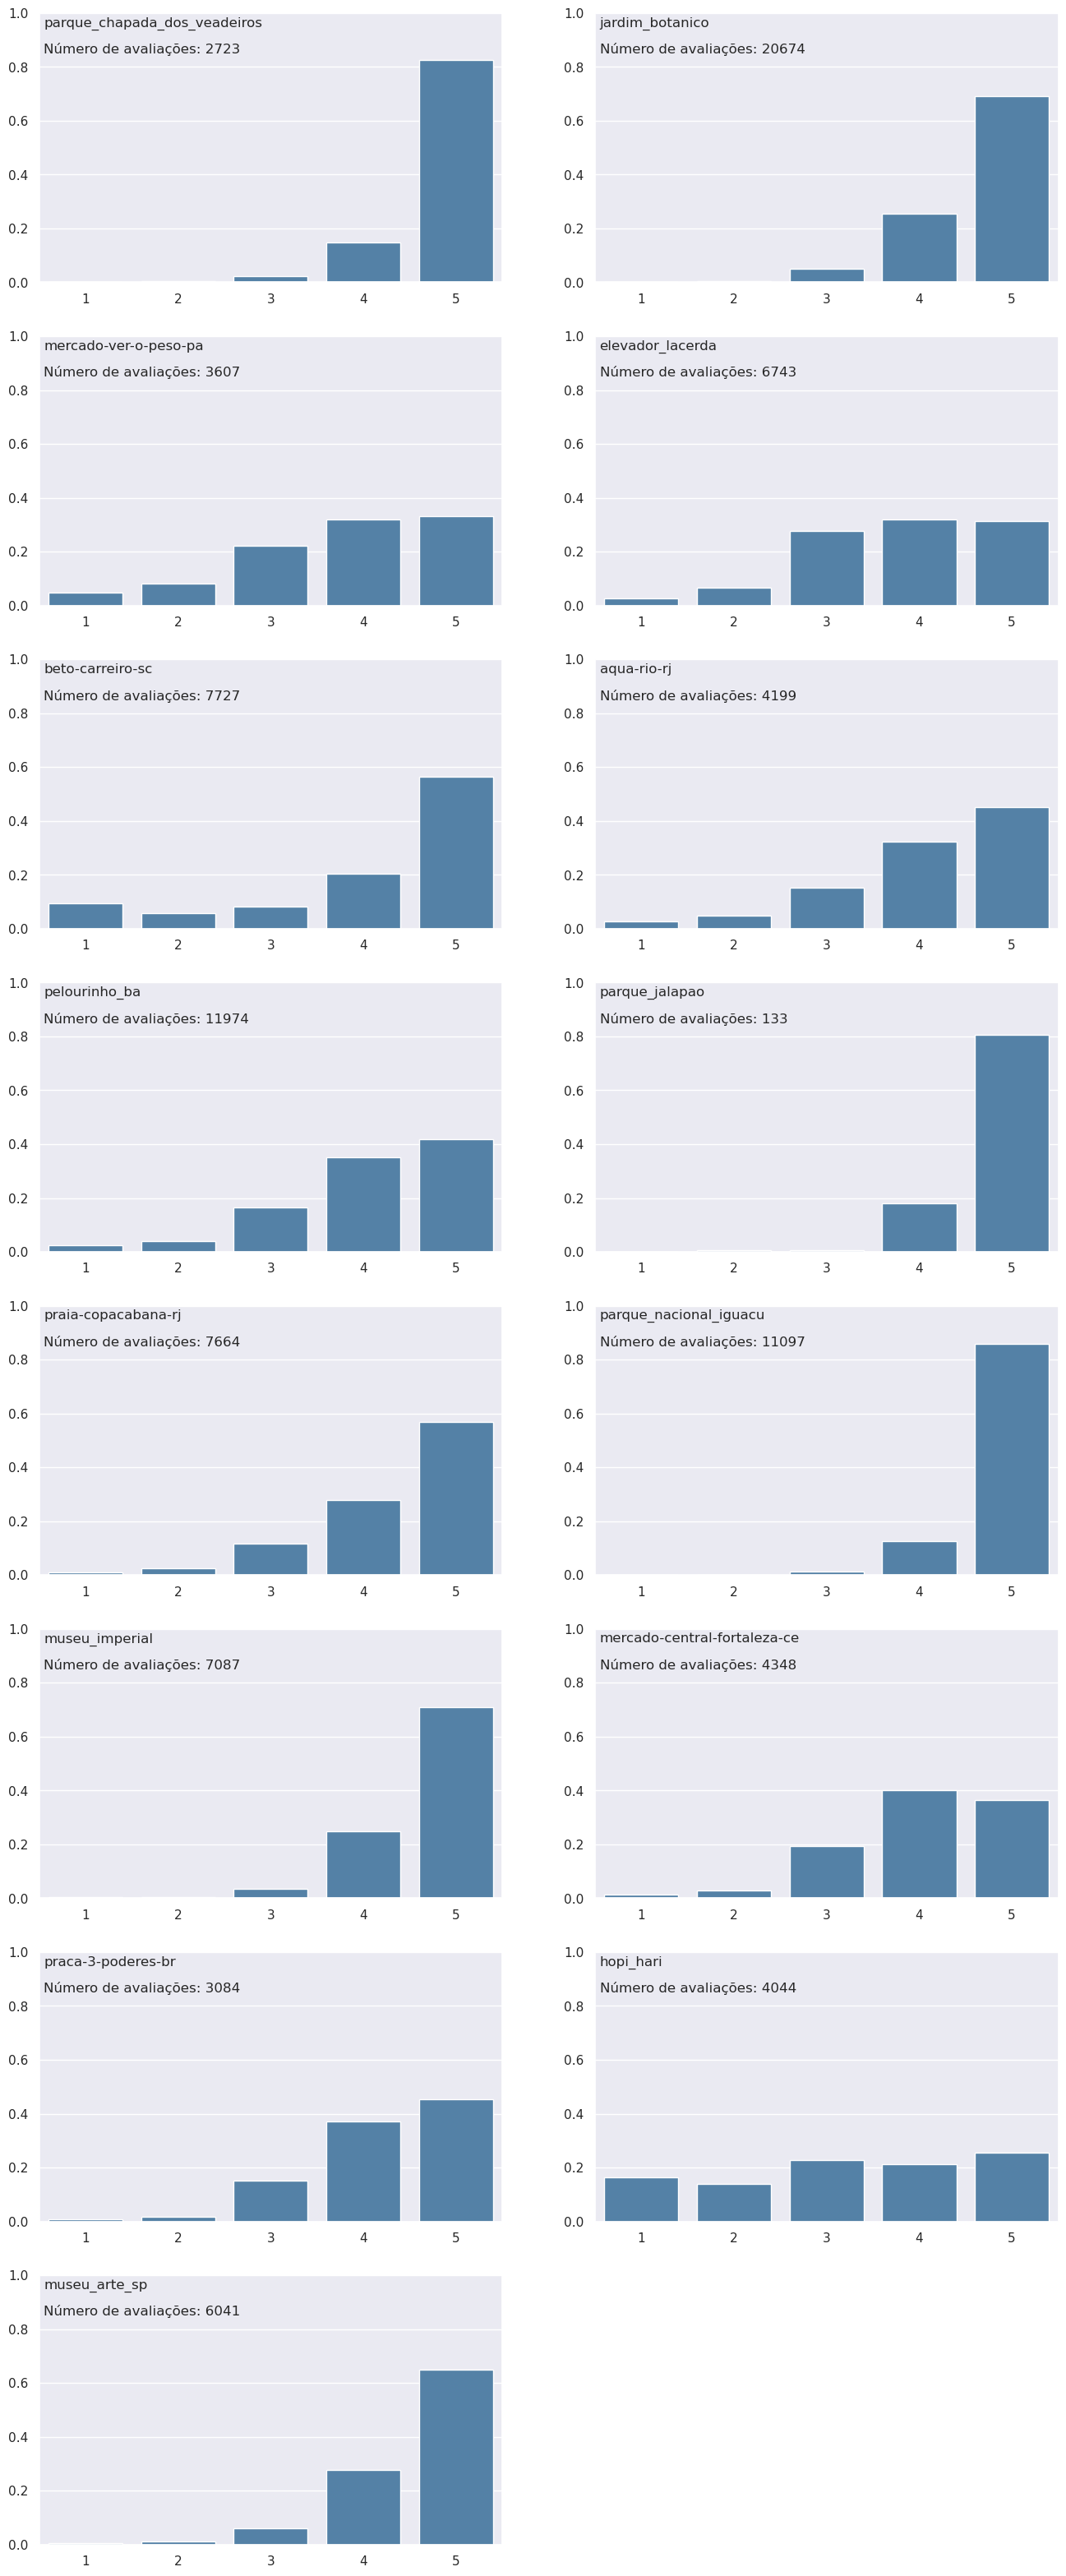

In [193]:
#Plotar graficos com as proporções das avaliações para cada atração
fig,axs=plt.subplots(8,2,figsize=(16,40))
sns.set_theme(style='darkgrid')
row_subplot=0
col_subplot=0
plt.title('Proporção das avaliações para cada atração')
for num_atracao in range(len(proporcao_notas)):
    atracao=proporcao_notas.index[num_atracao]
    ax=sns.barplot(x=[1,2,3,4,5],y=proporcao_notas.iloc[num_atracao,:5],ax=axs[row_subplot,col_subplot],color='steelblue')
    ax.text(-0.45, 0.95, atracao)
    ax.text(-0.45, 0.85, "Número de avaliações: {}".format(proporcao_notas.loc[atracao,'Total Avaliações']))
    ax.set(ylabel=None)
    ax.set_ylim(0,1)
    row_subplot+=1
    if row_subplot>7:
        row_subplot=0
        col_subplot=1
fig.delaxes(axs[7][1])


In [170]:
#Criação de dataframe com proporção de avaliações negativas, neutras e positivas

#Avaliação negativa - notas 1 e 2
#Avaliação neutra   - nota 3
#Avaliação positiva - notas 4 e 5


pos_neutra_neg=pd.concat((proporcao_notas.iloc[:,:2].sum(axis=1),
                          proporcao_notas.iloc[:,2],
                          proporcao_notas.iloc[:,3:5].sum(axis=1)),axis=1)
pos_neutra_neg.columns=['Negativas(%)',
                        'Neutras(%)',
                        'Positivas(%)']

pos_neutra_neg

,Negativas(%),Neutras(%),Positivas(%)
parque_chapada_dos_veadeiros,0.005876,0.021667,0.972457
mercado-ver-o-peso-pa,0.126421,0.222345,0.651234
beto-carreiro-sc,0.150641,0.080756,0.768604
pelourinho_ba,0.064640,0.165692,0.769668
praia-copacabana-rj,0.034708,0.117563,0.847730
museu_imperial,0.007902,0.034994,0.957105
praca-3-poderes-br,0.023022,0.150778,0.826200
museu_arte_sp,0.014898,0.060420,0.924681
jardim_botanico,0.005127,0.050498,0.944375
elevador_lacerda,0.091799,0.278066,0.630135


/home/rodolfo/anaconda3/envs/Trabalho/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rodolfo/anaconda3/envs/Trabalho/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rodolfo/anaconda3/envs/Trabalho/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[[<matplotlib.axis.YTick at 0x7d88415cc850>,

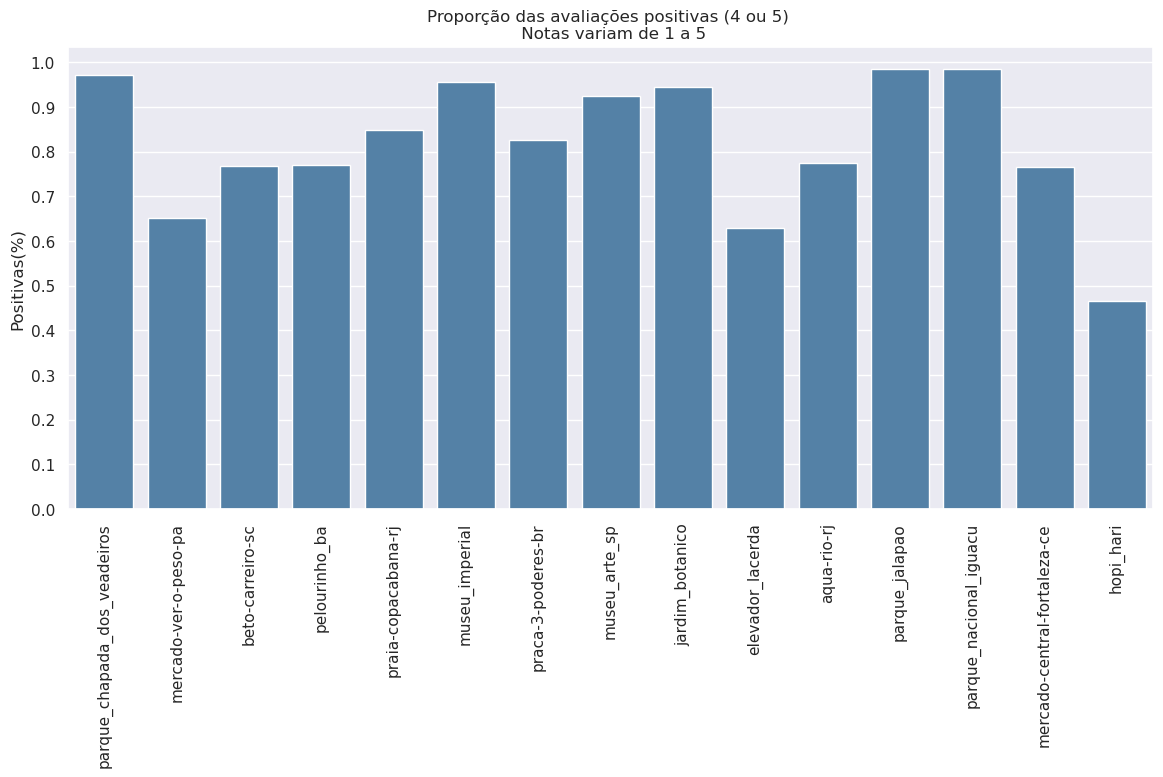

In [200]:
plt.figure(figsize=(14,6))
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
plt.title('Proporção das avaliações positivas (4 ou 5) \n Notas variam de 1 a 5')
g=sns.barplot(pos_neutra_neg,x=pos_neutra_neg.index,y=pos_neutra_neg['Positivas(%)'],color='steelblue')
g.set(yticks=np.arange(0,1.1,0.1))


/home/rodolfo/anaconda3/envs/Trabalho/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rodolfo/anaconda3/envs/Trabalho/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rodolfo/anaconda3/envs/Trabalho/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[[<matplotlib.axis.YTick at 0x7d884b4ba070>,

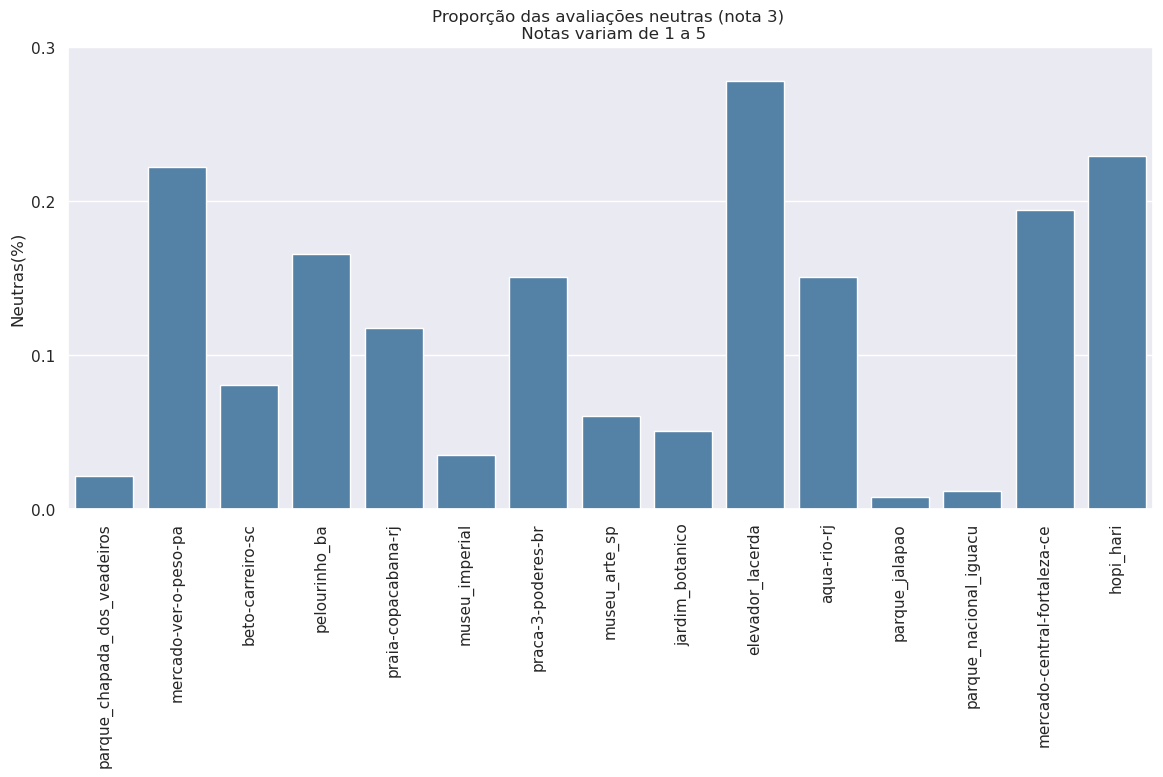

In [205]:
plt.figure(figsize=(14,6))
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
plt.title('Proporção das avaliações neutras (nota 3) \n Notas variam de 1 a 5')
g=sns.barplot(pos_neutra_neg,x=pos_neutra_neg.index,y=pos_neutra_neg['Neutras(%)'],color='steelblue')
g.set(yticks=np.arange(0,0.4,0.1))

/home/rodolfo/anaconda3/envs/Trabalho/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rodolfo/anaconda3/envs/Trabalho/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rodolfo/anaconda3/envs/Trabalho/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[[<matplotlib.axis.YTick at 0x7d884b3205b0>,

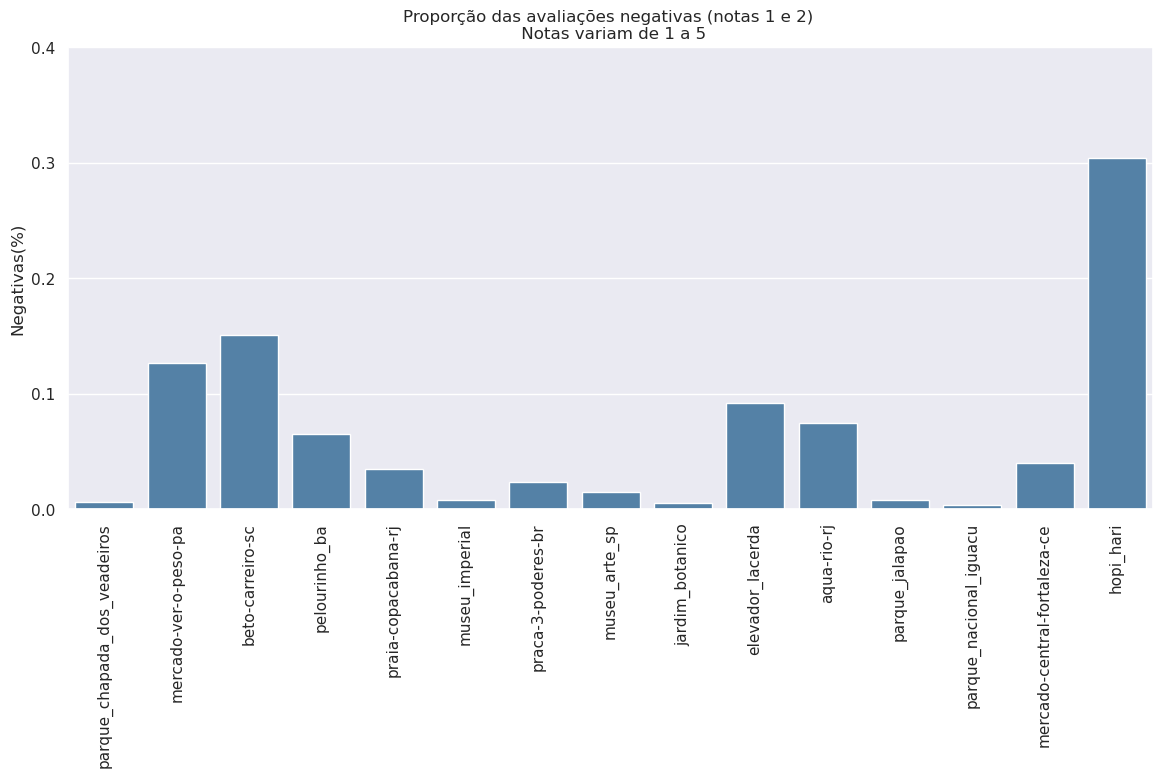

In [207]:
plt.figure(figsize=(14,6))
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
plt.title('Proporção das avaliações negativas (notas 1 e 2) \n Notas variam de 1 a 5')
g=sns.barplot(pos_neutra_neg,x=pos_neutra_neg.index,y=pos_neutra_neg['Negativas(%)'],color='steelblue')
g.set(yticks=np.arange(0,0.5,0.1))

In [155]:
'''
#Plotar graficos com as proporções das avaliações para cada atração
fig,axs=plt.subplots(8,2,figsize=(16,40))
row_subplot=0
col_subplot=0
for atracao in nome_atracoes:
    notas_atracao=dados[atracao]
    notas_atracao=notas_atracao.groupby('nota').agg(Número_de_Avaliações=('nota','count'))
    notas_atracao['Proporção de Avaliações']=notas_atracao['Número_de_Avaliações']/notas_atracao['Número_de_Avaliações'].sum()
    notas_atracao.reset_index(inplace=True)
    ax=sns.barplot(notas_atracao,x='nota',y='Proporção de Avaliações',ax=axs[row_subplot,col_subplot],color='steelblue')
    ax.text(-0.45, 0.95, atracao)
    ax.text(-0.45, 0.85, "Número de avaliações: {}".format(notas_atracao['Número_de_Avaliações'].sum()))
    ax.set_ylim(0,1)
    row_subplot+=1
    if row_subplot>7:
        row_subplot=0
        col_subplot=1
fig.delaxes(axs[7][1])
'''

'\n#Plotar graficos com as proporções das avaliações para cada atração\nfig,axs=plt.subplots(8,2,figsize=(16,40))\nrow_subplot=0\ncol_subplot=0\nfor atracao in nome_atracoes:\n    notas_atracao=dados[atracao]\n    notas_atracao=notas_atracao.groupby(\'nota\').agg(Número_de_Avaliações=(\'nota\',\'count\'))\n    notas_atracao[\'Proporção de Avaliações\']=notas_atracao[\'Número_de_Avaliações\']/notas_atracao[\'Número_de_Avaliações\'].sum()\n    notas_atracao.reset_index(inplace=True)\n    ax=sns.barplot(notas_atracao,x=\'nota\',y=\'Proporção de Avaliações\',ax=axs[row_subplot,col_subplot],color=\'steelblue\')\n    ax.text(-0.45, 0.95, atracao)\n    ax.text(-0.45, 0.85, "Número de avaliações: {}".format(notas_atracao[\'Número_de_Avaliações\'].sum()))\n    ax.set_ylim(0,1)\n    row_subplot+=1\n    if row_subplot>7:\n        row_subplot=0\n        col_subplot=1\nfig.delaxes(axs[7][1])\n'

In [212]:
teste=pos_neutra_neg.T

In [219]:
teste.reset_index(inplace=True)

In [220]:
teste

,index,parque_chapada_dos_veadeiros,mercado-ver-o-peso-pa,beto-carreiro-sc,pelourinho_ba,praia-copacabana-rj,museu_imperial,praca-3-poderes-br,museu_arte_sp,jardim_botanico,elevador_lacerda,aqua-rio-rj,parque_jalapao,parque_nacional_iguacu,mercado-central-fortaleza-ce,hopi_hari
0,Negativas(%),0.005876,0.126421,0.150641,0.064640,0.034708,0.007902,0.023022,0.014898,0.005127,0.091799,0.074303,0.007519,0.003424,0.040248,0.304154
1,Neutras(%),0.021667,0.222345,0.080756,0.165692,0.117563,0.034994,0.150778,0.060420,0.050498,0.278066,0.150750,0.007519,0.011715,0.194112,0.229228
2,Positivas(%),0.972457,0.651234,0.768604,0.769668,0.847730,0.957105,0.826200,0.924681,0.944375,0.630135,0.774946,0.984962,0.984861,0.765639,0.466617


In [221]:
teste.columns

Index(['index', 'parque_chapada_dos_veadeiros', 'mercado-ver-o-peso-pa',
       'beto-carreiro-sc', 'pelourinho_ba', 'praia-copacabana-rj',
       'museu_imperial', 'praca-3-poderes-br', 'museu_arte_sp',
       'jardim_botanico', 'elevador_lacerda', 'aqua-rio-rj', 'parque_jalapao',
       'parque_nacional_iguacu', 'mercado-central-fortaleza-ce', 'hopi_hari'],
      dtype='object')

In [224]:
sns.barplot(teste[:,1],hue=teste['index'])

InvalidIndexError: (slice(None, None, None), 1)

In [218]:
sns.barplot(teste,x=teste.index,y='parque_chapada_dos_veadeiros',hue=teste.index)

/home/rodolfo/anaconda3/envs/Trabalho/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rodolfo/anaconda3/envs/Trabalho/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rodolfo/anaconda3/envs/Trabalho/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rodolfo/anaconda3/envs/Trabalho/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).